In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv
/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import math
import statistics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Input, BatchNormalization

In [5]:
import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score,precision_score, accuracy_score
from sklearn.metrics import confusion_matrix

# For tuning the model
from sklearn.model_selection import GridSearchCV

#from scikeras.wrappers import KerasClassifier

In [6]:
import random
from tensorflow.keras import backend

# Review datasets provided and import additional dataset to merge with training dataset

In [7]:
# import additional dataset that was not provided
orig_data = pd.read_csv("/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv")
orig_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [9]:
orig_data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,2111,2,Male,1068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,2111.0,NaN,NaN,NaN,24.3126,6.345968,14.0,19.947192,22.77789,26.0,61.0
Height,2111.0,NaN,NaN,NaN,1.701677,0.093305,1.45,1.63,1.700499,1.768464,1.98
Weight,2111.0,NaN,NaN,NaN,86.586058,26.191172,39.0,65.473343,83.0,107.430682,173.0
family_history_with_overweight,2111,2,yes,1726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAVC,2111,2,yes,1866,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FCVC,2111.0,NaN,NaN,NaN,2.419043,0.533927,1.0,2.0,2.385502,3.0,3.0
NCP,2111.0,NaN,NaN,NaN,2.685628,0.778039,1.0,2.658738,3.0,3.0,4.0
CAEC,2111,4,Sometimes,1765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SMOKE,2111,2,no,2067,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
train_data = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [88]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

No missing values

In [89]:
train_data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,20758.0,NaN,NaN,NaN,10378.5,5992.46278,0.0,5189.25,10378.5,15567.75,20757.0
Gender,20758,2,Female,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,20758.0,NaN,NaN,NaN,23.841804,5.688072,14.0,20.0,22.815416,26.0,61.0
Height,20758.0,NaN,NaN,NaN,1.700245,0.087312,1.45,1.631856,1.7,1.762887,1.975663
Weight,20758.0,NaN,NaN,NaN,87.887768,26.379443,39.0,66.0,84.064875,111.600553,165.057269
family_history_with_overweight,20758,2,yes,17014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAVC,20758,2,yes,18982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FCVC,20758.0,NaN,NaN,NaN,2.445908,0.533218,1.0,2.0,2.393837,3.0,3.0
NCP,20758.0,NaN,NaN,NaN,2.761332,0.705375,1.0,3.0,3.0,3.0,4.0
CAEC,20758,4,Sometimes,17529,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
val_data = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")
val_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [91]:
val_data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,13840.0,NaN,NaN,NaN,27677.5,3995.408198,20758.0,24217.75,27677.5,31137.25,34597.0
Gender,13840,2,Female,6965,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,13840.0,NaN,NaN,NaN,23.95274,5.799814,14.0,20.0,22.906342,26.0,61.0
Height,13840.0,NaN,NaN,NaN,1.698934,0.088761,1.45,1.631662,1.7,1.76071,1.98
Weight,13840.0,NaN,NaN,NaN,87.384504,26.111819,39.0,65.0,83.952968,111.157811,165.057269
family_history_with_overweight,13840,2,yes,11384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAVC,13840,2,yes,12583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FCVC,13840.0,NaN,NaN,NaN,2.442898,0.531606,1.0,2.0,2.358087,3.0,3.0
NCP,13840.0,NaN,NaN,NaN,2.75061,0.710927,1.0,3.0,3.0,3.0,4.0
CAEC,13840,4,Sometimes,11689,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
orig_data_copy = orig_data.copy()
train_data_copy = train_data.copy()
val_data_copy = val_data.copy()

# Merge original ObesityDataSet and train.csv 

## Make names and order of columns in 2 datasets the same

In [93]:
# remove id column from train data
train_data = train_data.drop('id', axis = 1)

In [94]:
#get ids of validation data in a separate column
val_ids = val_data['id']
val_data = val_data.drop('id', axis = 1)

In [95]:
# sort column names to makes the identical
orig_data.sort_index(axis = 1, inplace = True)
train_data.sort_index(axis = 1, inplace = True)
val_data.sort_index(axis = 1, inplace = True)

In [96]:
# check for duplicated rows within each file
is_duplicate_orig = orig_data.duplicated()
if is_duplicate_orig.empty:
    print ('There are duplicates in the original file')
    print (is_duplicate_orig)
else:
    print ('No duplicates in original file')

No duplicates in original file


In [97]:
is_duplicate_train = train_data.duplicated()
if is_duplicate_train.empty:
    print ('There are duplicates in the training file')
    print (is_duplicate_train)
else:
    print ('No duplicates in training file')

No duplicates in training file


In [98]:
# check if there are identical entries in both files
identical_rows = pd.merge(orig_data, train_data, how = 'inner')
if identical_rows.empty:
    print ("No overlapping rows")
else:
    print(identical_rows)

No overlapping rows


In [99]:
#Combine 2 files into one full training set
full_train = pd.concat([train_data,orig_data]).reset_index(drop = True)
full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22869 entries, 0 to 22868
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             22869 non-null  float64
 1   CAEC                            22869 non-null  object 
 2   CALC                            22869 non-null  object 
 3   CH2O                            22869 non-null  float64
 4   FAF                             22869 non-null  float64
 5   FAVC                            22869 non-null  object 
 6   FCVC                            22869 non-null  float64
 7   Gender                          22869 non-null  object 
 8   Height                          22869 non-null  float64
 9   MTRANS                          22869 non-null  object 
 10  NCP                             22869 non-null  float64
 11  NObeyesdad                      22869 non-null  object 
 12  SCC                             

# Feature Engineering

BMI data for children

[https://www.cdc.gov/healthyweight/assessing/bmi/childrens_bmi/about_childrens_bmi.html](http://)

To normalize childrens BMI (age 14 to 20) to adults, using the graph (y = BMI, x = Age), we can add 
dy/dx * (delta x) 
to calculated BMI

(23-19)/(20-14) * (20-'Age') + BMI for boys

(21.75-19.25)/(20-14) * (20-'Age') + BMI for girls


In [100]:
full_train['BMI'] = full_train.apply(lambda x: 
                                     (x['Weight']/(x['Height'])**2 + (23-19)/(20-14) * (20-x['Age'])) if (x['Age']<20 and x['Gender']=='Male')
                                     else
                                     (x['Weight']/(x['Height'])**2 + (21.75-19.25)/(20-14) * (20-x['Age'])) if (x['Age']<20 and x['Gender']=='Female')
                                     else
                                     (x['Weight']/(x['Height'])**2), axis = 1
                                    )

In [101]:
val_data['BMI'] = val_data.apply(lambda x: 
                                     (x['Weight']/(x['Height'])**2 + (23-19)/(20-14) * (20-x['Age'])) if (x['Age']<20 and x['Gender']=='Male')
                                     else
                                     (x['Weight']/(x['Height'])**2 + (21.75-19.25)/(20-14) * (20-x['Age'])) if (x['Age']<20 and x['Gender']=='Female')
                                     else
                                     (x['Weight']/(x['Height'])**2), axis = 1
                                    )

In [102]:
# Create bins for TUE
bins = [0,0.5,1.5,np.inf]
names = ['<0.5','0.5-1.5','2.5+']
full_train['TUE_bins'] = pd.cut(full_train['TUE'], bins, labels = names)
val_data['TUE_bins'] = pd.cut(val_data['TUE'], bins, labels = names)

# EDA

## Univariate Analysis

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
# Function to plot boxplot and histogram along the same scale
def histogram_boxplot (data, feature, figsize = (12,7), kde = True, bins = None):
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows = 2,
        sharex = True,
        gridspec_kw = {"height_ratios":(0.25,0.75)},
        figsize = figsize
    )
    sns.boxplot(
        data = data,
        x = feature,
        ax = ax_box,
        showmeans = True,
        color = 'violet'
    )
    sns.histplot(
        data = data,
        x = feature,
        kde = kde,
        ax = ax_hist,
        bins = bins) if bins else sns.histplot(
        data = data,
        x = feature,
        kde = kde,
        ax = ax_hist,
    )
    #draw mean and median lines on the histogram
    ax_hist.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )
    ax_hist.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )

In [105]:
#Function to create labeled barplots
# n is to display top n category.  Default - display all
def labeled_barplot(data, feature, perc = False, n = None):
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [106]:
# Create arrays with numerical and categorical columns
num_cols = ['Age', 'CH2O', 'FAF','FCVC', 'Height','NCP','TUE','Weight', 'BMI']

cat_cols = ['NObeyesdad','CAEC','CALC', 'FAVC','Gender','MTRANS','SCC','SMOKE','family_history_with_overweight','TUE_bins']

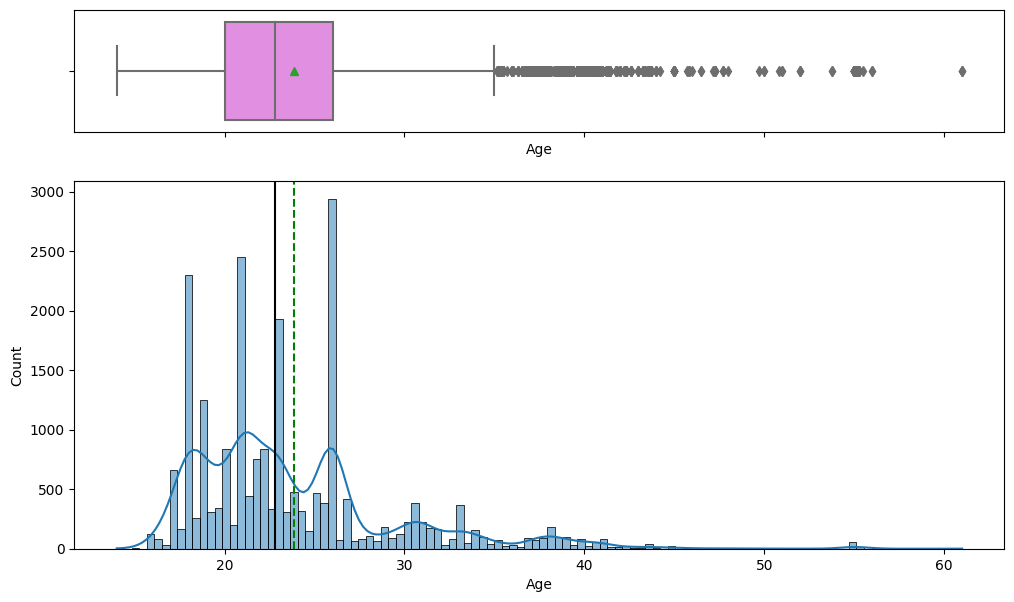

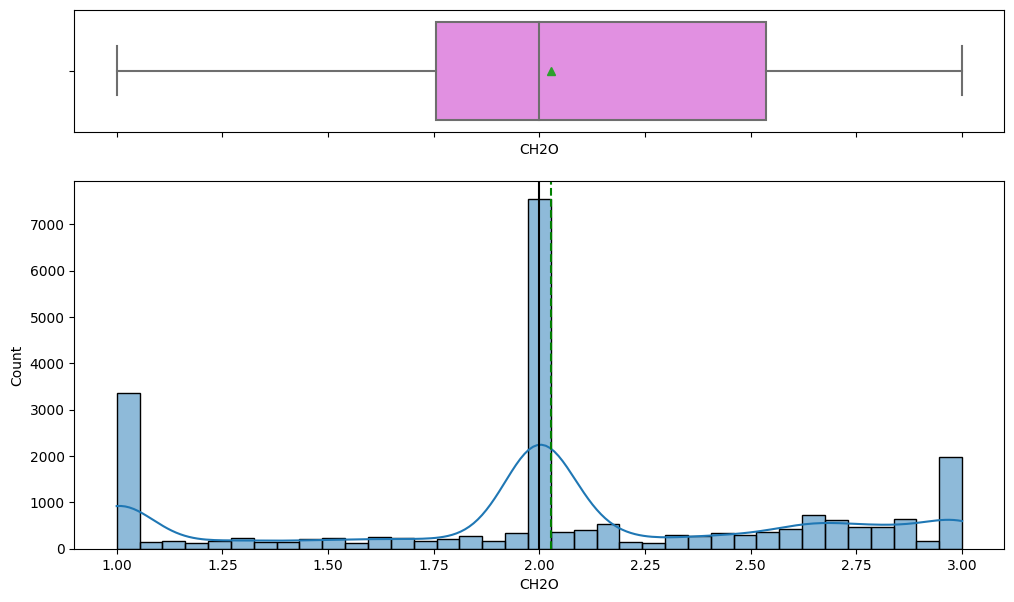

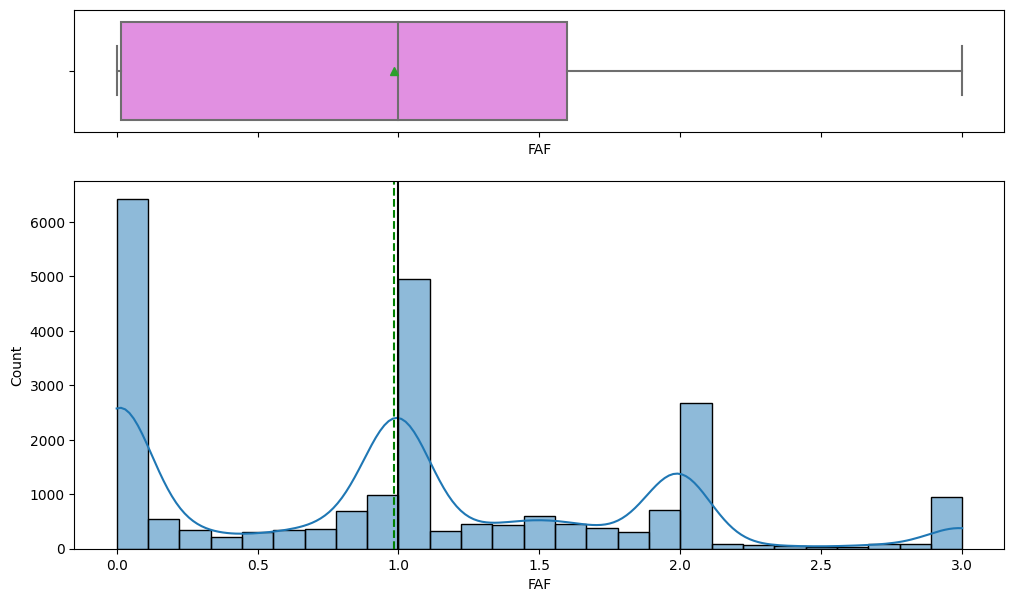

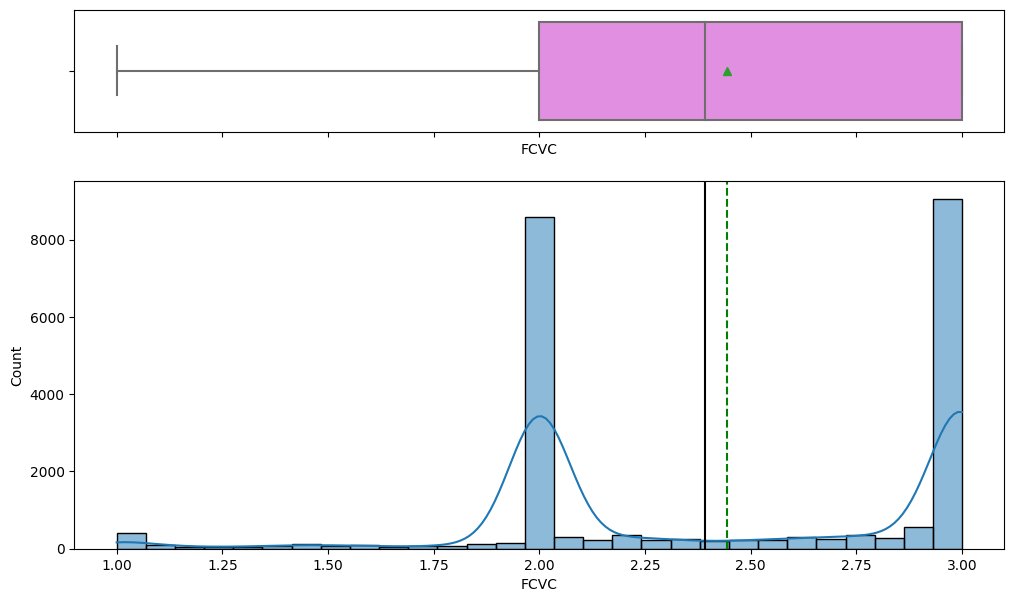

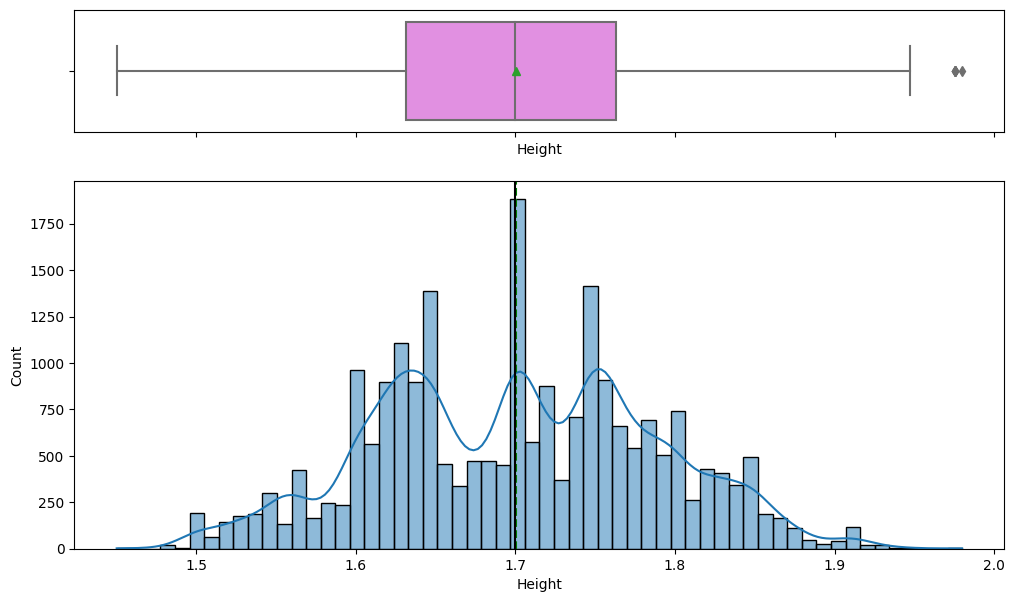

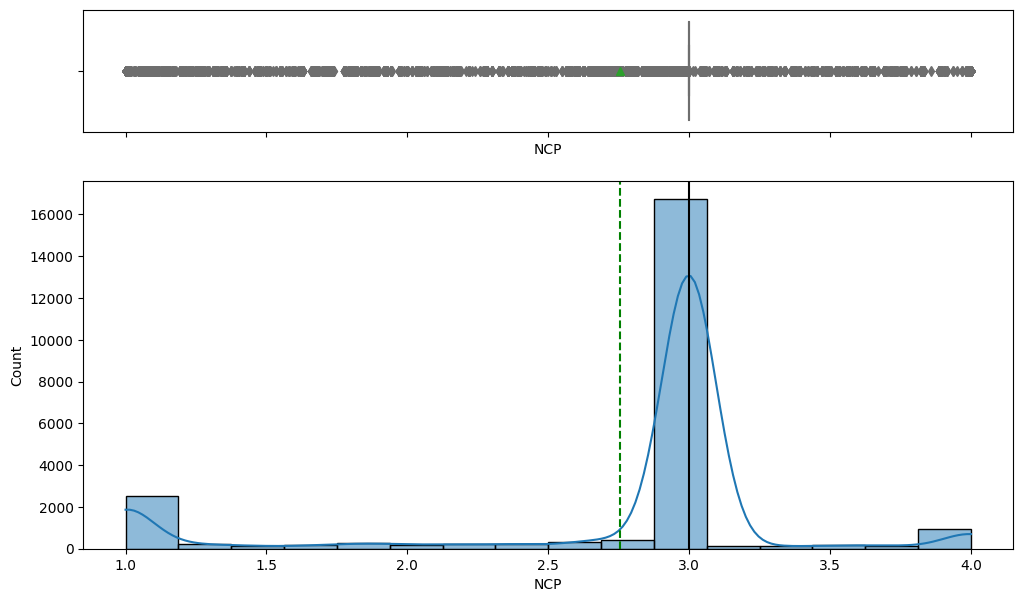

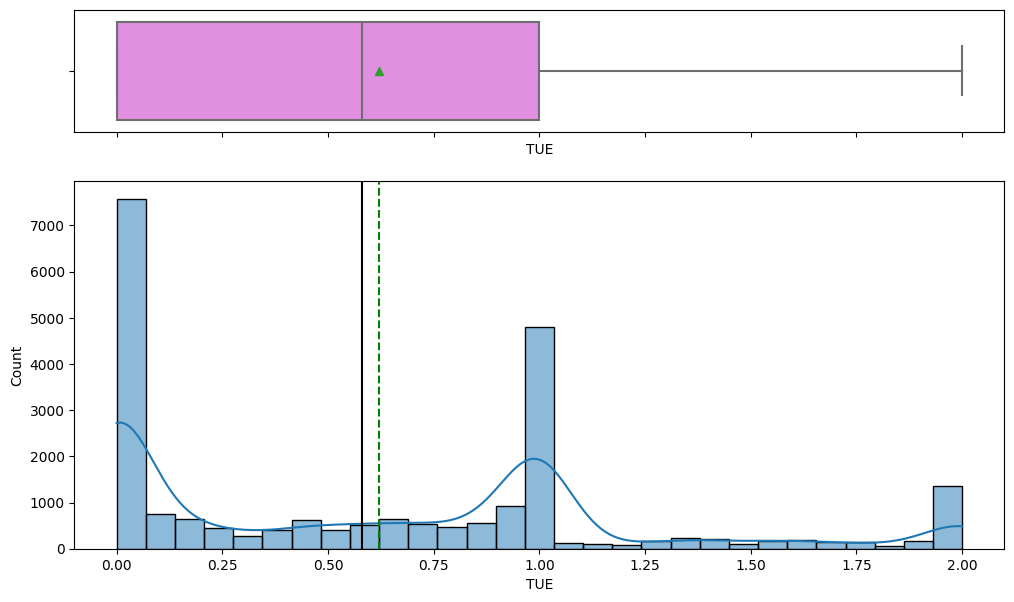

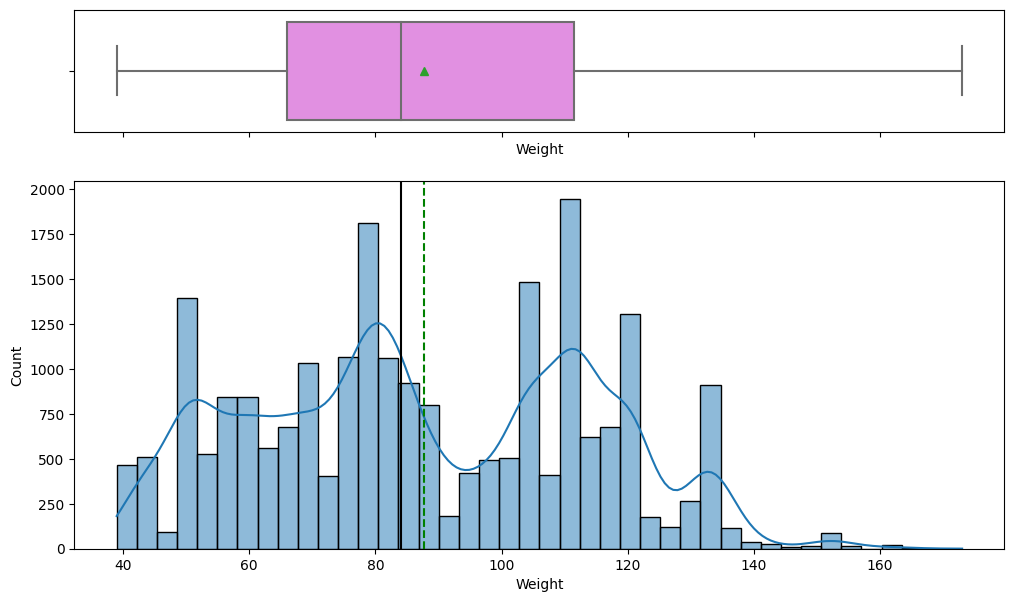

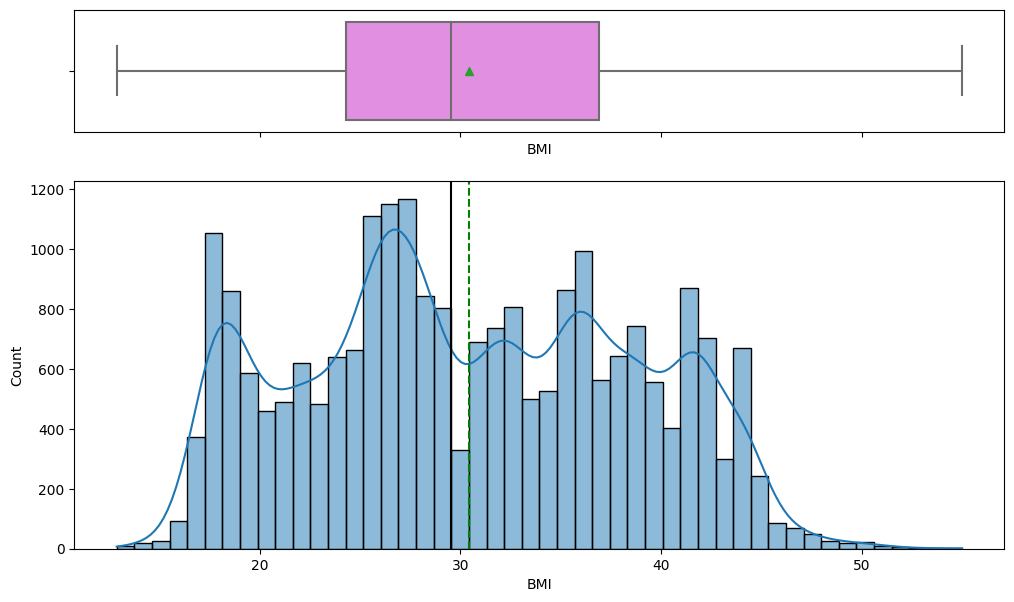

In [107]:
# Creating plots for numerical columns
for i in num_cols:
    histogram_boxplot(full_train, i)

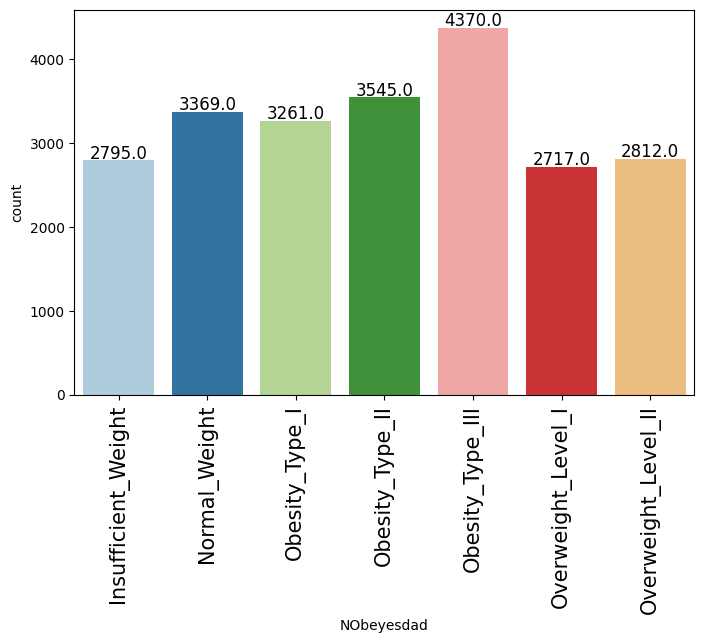

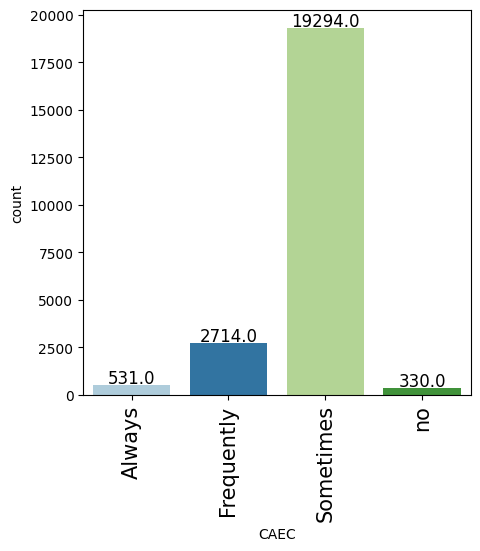

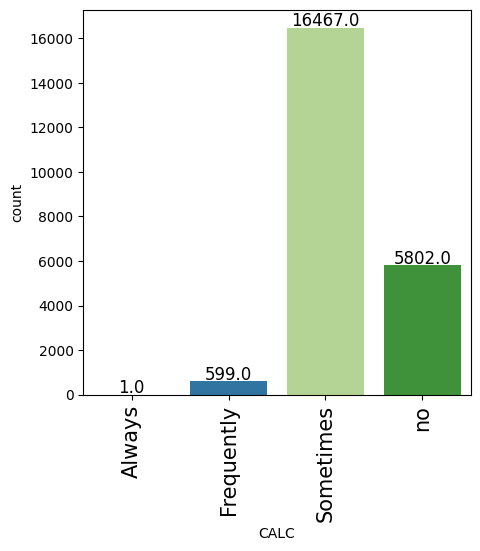

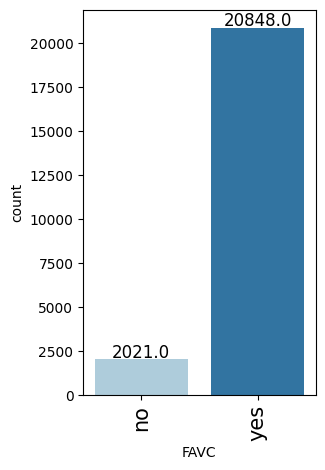

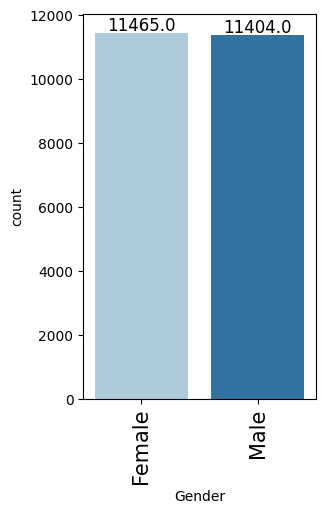

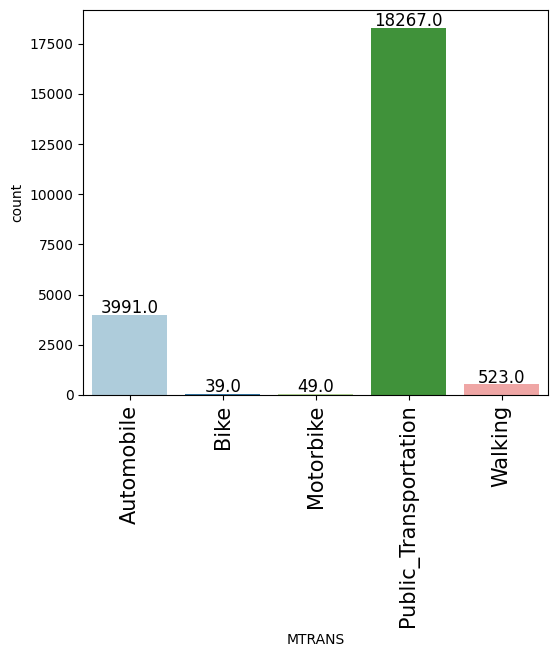

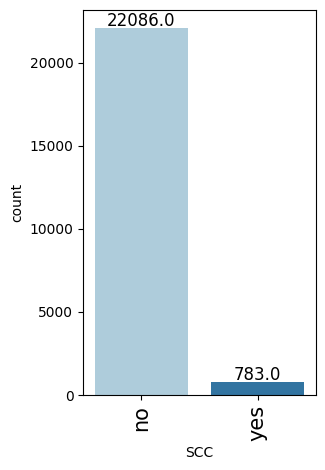

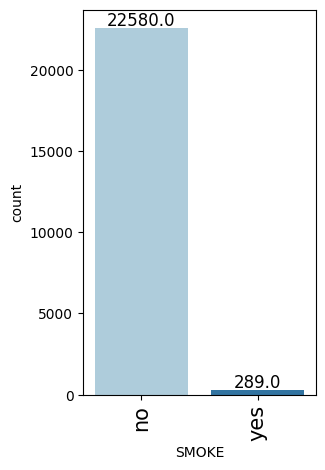

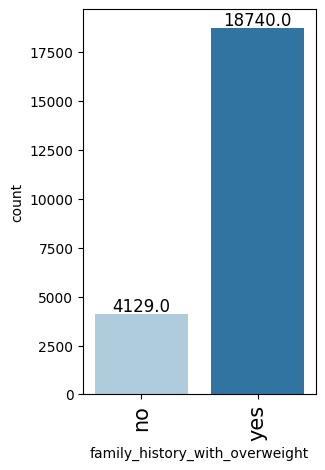

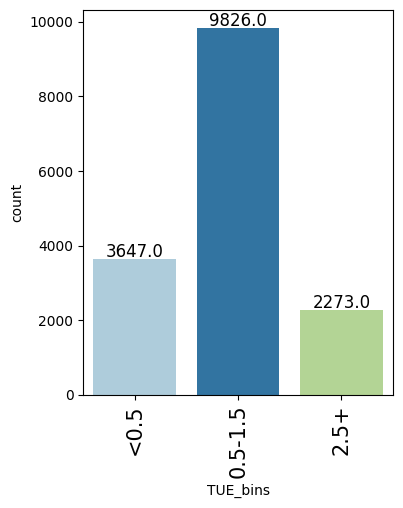

In [108]:
for i in cat_cols:
    labeled_barplot(full_train, i, perc = False)

## Bivariate and Multivariate Analysis

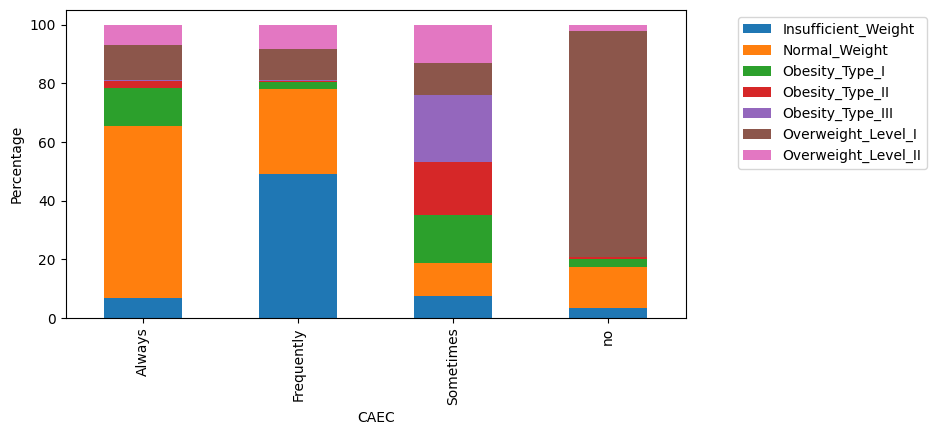

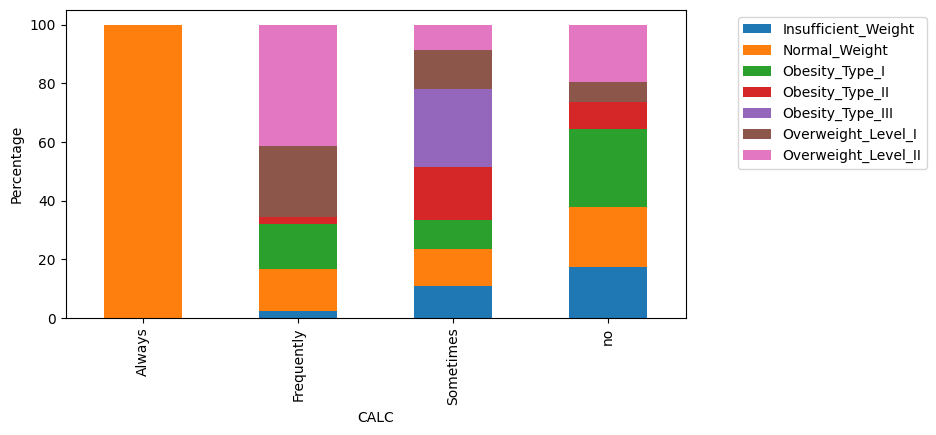

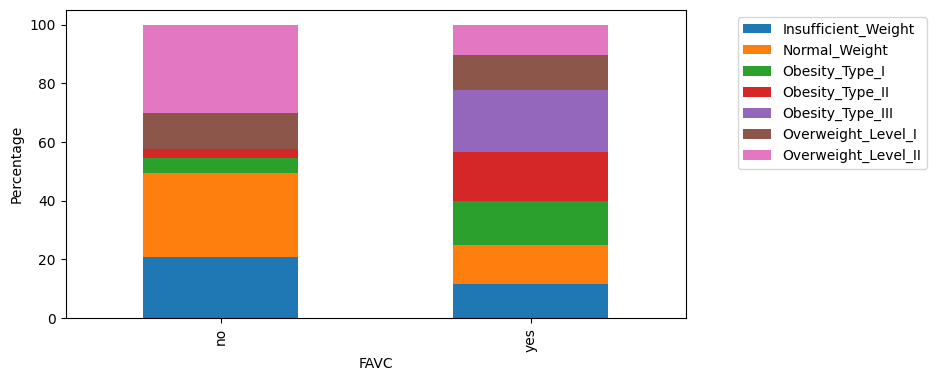

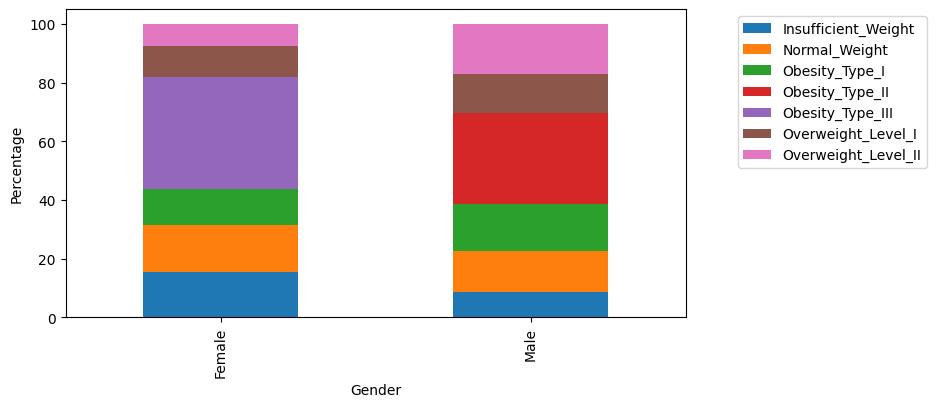

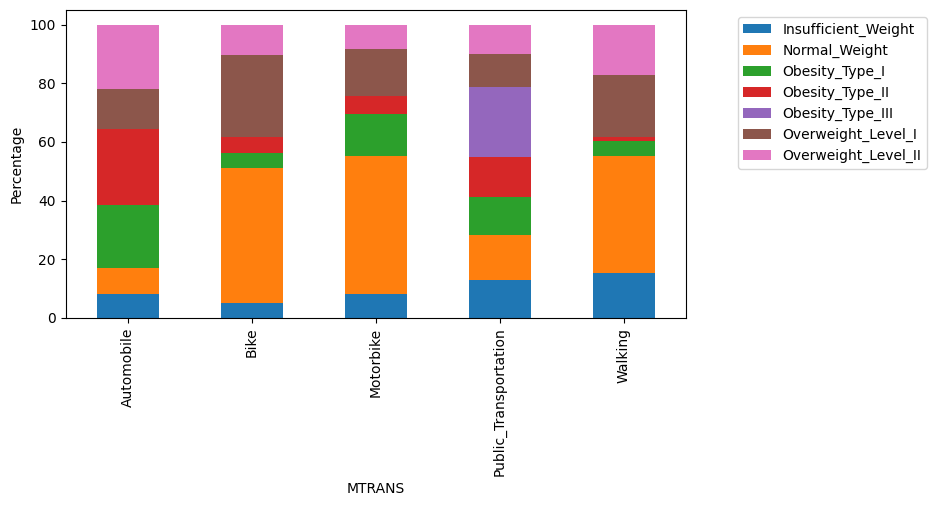

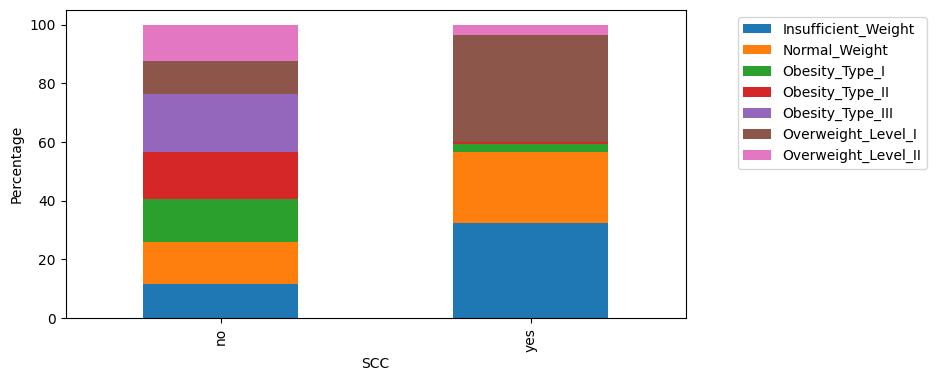

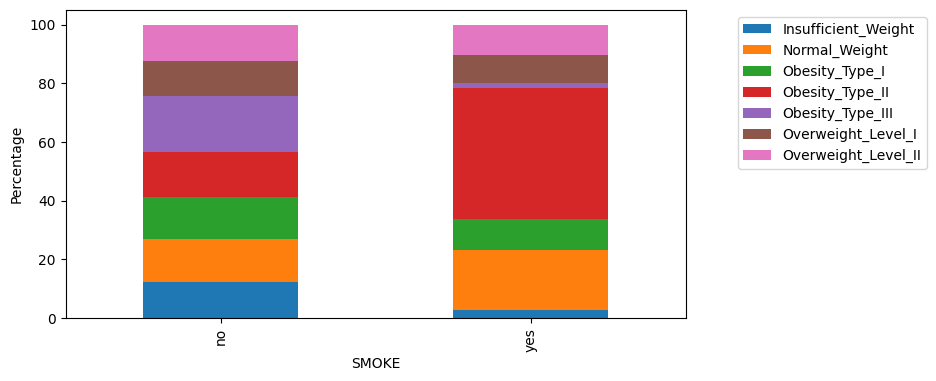

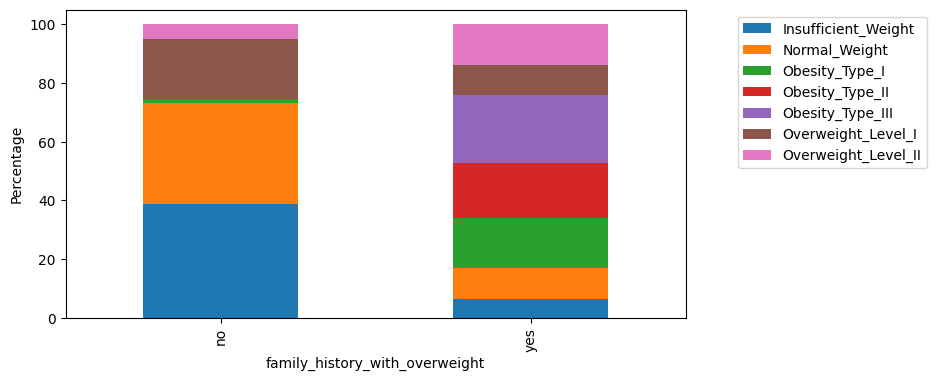

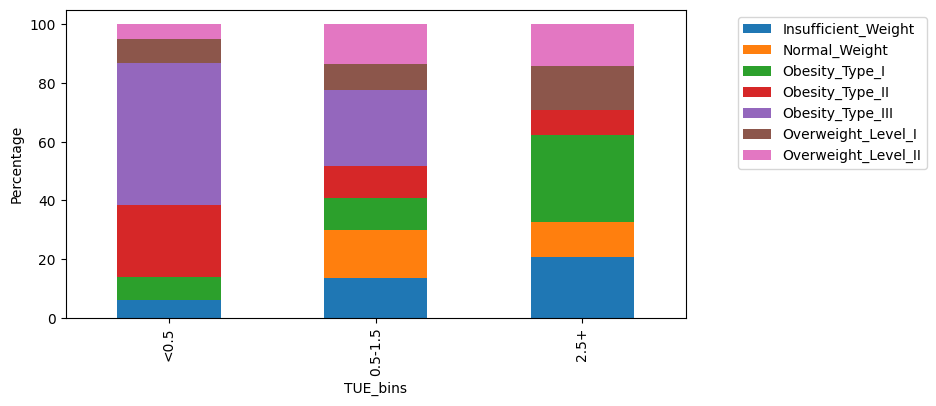

In [109]:
for i in cat_cols:
    if i != 'NObeyesdad':
        (pd.crosstab(full_train[i], full_train['NObeyesdad'], normalize = 'index')*100).plot(
        kind = 'bar', figsize = (8,4), stacked = True
        )
        plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right')
        plt.ylabel('Percentage')

In [110]:
# Encode categorical columns
full_train_encode = full_train.copy()
for i in cat_cols:
    new_i = i+"_encoded"
    full_train_encode[new_i] = pd.factorize(full_train_encode[i])[0]

In [ ]:
# Get correlation heatmap
col_list = full_train_encode.select_dtypes(include = np.number).columns.tolist()
plt.figure(figsize = (25,15))
sns.heatmap(
    full_train_encode[col_list].corr(numeric_only = True), annot = True, vmin = -1, 
    vmax = 1, fmt = ".2f", cmap = "Spectral"
)
plt.show()

# Get target variables

In [112]:
# get target variables
target = full_train['NObeyesdad']
full_train.drop(['NObeyesdad'], axis = 1, inplace = True)

In [113]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [114]:
target_encoded = encoder.fit_transform(pd.DataFrame(target)).toarray()

In [115]:
from sklearn.utils.class_weight import compute_class_weight
class_labels  = pd.factorize(np.array(target))[0]
class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(class_labels), y = class_labels)
class_weights = dict(zip(np.unique(class_labels), class_weights))
class_weights

{0: 1.1618065433854907,
 1: 0.9697239536954586,
 2: 1.1688729874776387,
 3: 0.7475972540045767,
 4: 0.9215796897038082,
 5: 1.2024291497975708,
 6: 1.0018399264029438}

# Create mutltiple variations of data

## 1. Minimal columns

In [116]:
# First set: drop unnecessary columns
full_train1 = full_train.drop(['TUE', 'MTRANS', 'SCC', 'SMOKE', 'CALC', 'CAEC', 'FAVC', 'Height', 'Weight'], axis = 1)

In [117]:
val_data1 = val_data.drop(['TUE', 'MTRANS', 'SCC', 'SMOKE', 'CALC', 'CAEC', 'FAVC', 'Height', 'Weight'], axis = 1)

In [118]:
# encoding categorical columns
full_train1 = pd.get_dummies(
    full_train1, columns = full_train1.select_dtypes(exclude = np.number).columns.tolist(),
    drop_first = True,
)

In [119]:
val_data1 = pd.get_dummies(
    val_data1, columns = val_data1.select_dtypes(exclude = np.number).columns.tolist(),
    drop_first = True,
)

## 2. BMI

In [120]:
full_train2 = full_train.drop(['Height', 'Weight', 'TUE'], axis = 1)

In [121]:
val_data2 = val_data.drop(['Height', 'Weight', 'TUE'], axis = 1)

In [122]:
full_train2 = pd.get_dummies(
    full_train2, columns = full_train2.select_dtypes(exclude = np.number).columns.tolist(),
    drop_first = True,
)

In [123]:
val_data2 = pd.get_dummies(
    val_data2, columns = val_data2.select_dtypes(exclude = np.number).columns.tolist(),
    drop_first = True,
)

## 3. Original

In [124]:
full_train3 = full_train.drop(['BMI', 'TUE_bins'], axis = 1)

In [125]:
full_train3 = pd.get_dummies(
    full_train3, columns = full_train3.select_dtypes(exclude = np.number).columns.tolist(),
    drop_first = True,
)

# Split the data on train/test

In [126]:
X_train, X_test, y_train, y_test = train_test_split(full_train2, target_encoded, test_size = 0.2, random_state = 42)

In [127]:
#y_train_factorized = pd.factorize(np.array(y_train))[0]

In [128]:
# Creating metric function
def metric_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = tf.math.confusion_matrix(actual, predicted)
    f, ax = plt.subplots(figsize = (8,5))
    sns.heatmap(cm, annot = True, fmt = 'd',
                xticklabels = ['Insufficient Weight', 'Normal Weight', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III', 'Overweight Type I', 'Overweight Type II'],
                yticklabels = ['Insufficient Weight', 'Normal Weight', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III', 'Overweight Type I', 'Overweight Type II'],
               ax = ax)
    ax.set_ylabel('Predicted labels');ax.set_xlabel('True labels');
    plt.show()

# Model: Decision Tree

In [129]:
dt = DecisionTreeClassifier(random_state = 1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [130]:
#categories = {'Insufficient Weight':0, 'Normal Weight':1, 'Obesity Type I':2, 'Obesity Type II':3, 'Obesity Type III':4, 'Overweight Type I':5, 'Overweight Type II':6}

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       585
           1       0.76      0.78      0.77       667
           2       0.81      0.80      0.81       670
           3       0.93      0.92      0.92       718
           4       1.00      0.99      0.99       845
           5       0.61      0.66      0.63       531
           6       0.67      0.66      0.67       558

    accuracy                           0.83      4574
   macro avg       0.81      0.81      0.81      4574
weighted avg       0.83      0.83      0.83      4574



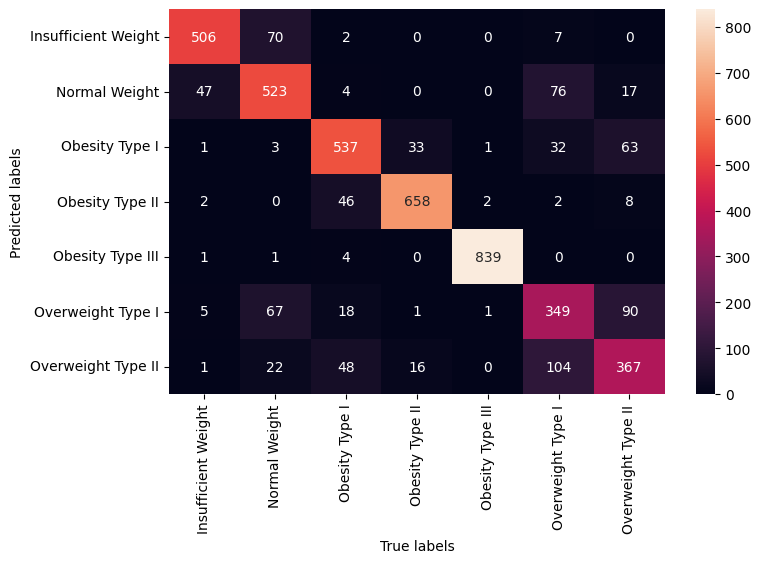

In [131]:
y_test_pred_dt = dt.predict(X_test)
#y_test_pred_categories = [categories[row.argmax()] for row in y_test_pred_dt]
#metric_score(pd.factorize(y_test)[0], pd.factorize(y_test_pred_categories)[0])
metric_score(np.argmax(y_test, axis = 1), np.argmax(y_test_pred_dt, axis = 1))

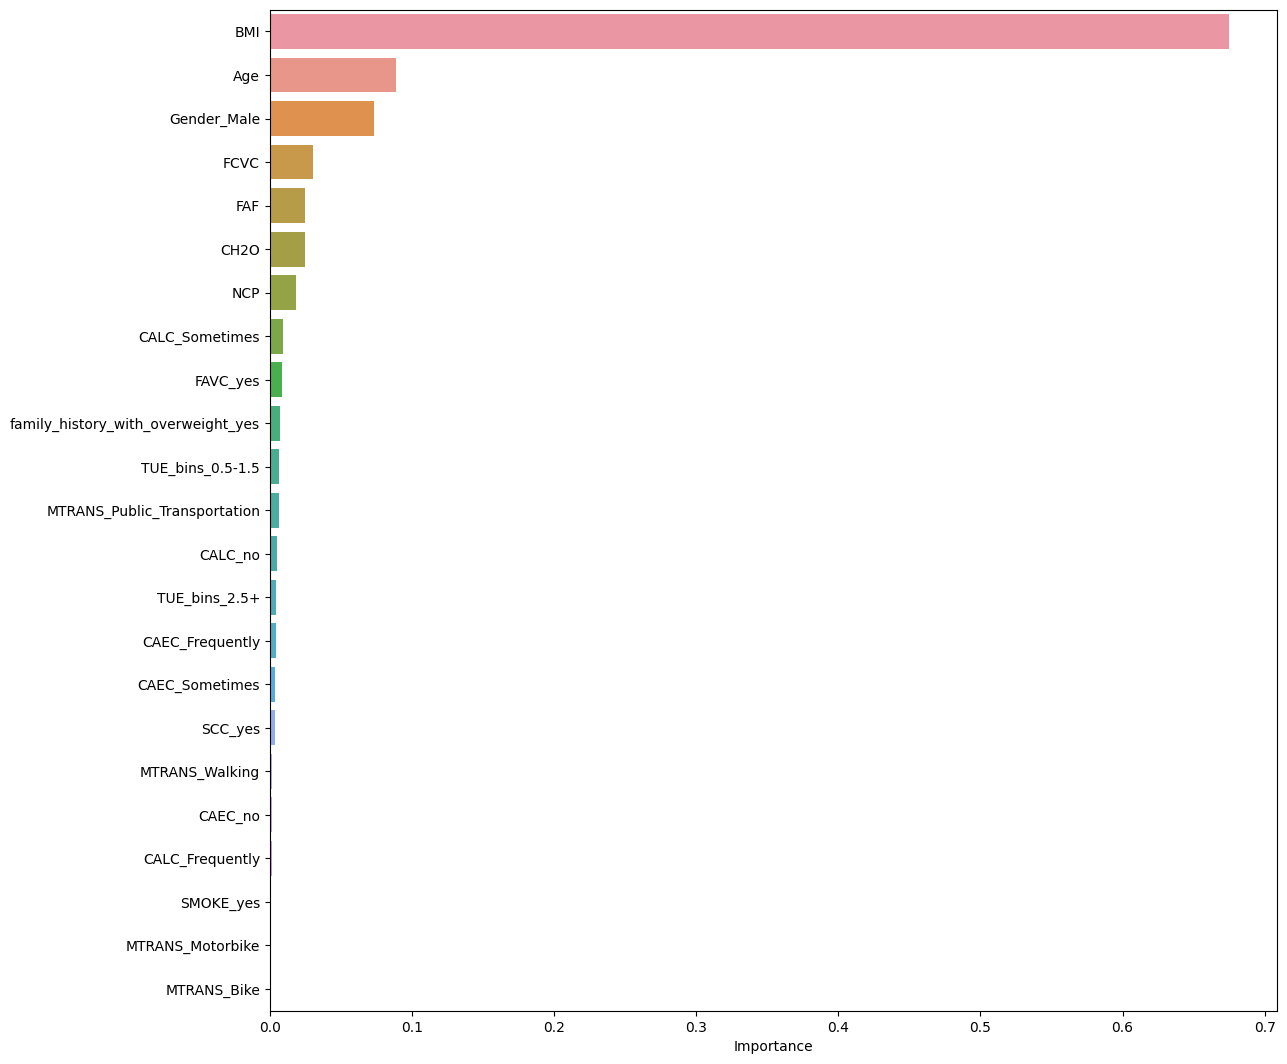

In [132]:
# Plot the feature importance

importances = dt.feature_importances_

columns = full_train2.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance,y=importance_df.index);

In [133]:
hyperparameters = dt.get_params()
print("Current Hyperparameters:")
print(hyperparameters)

Current Hyperparameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}


In [134]:
"""from sklearn.preprocessing import StandardScaler
from sklearn import decomposition, datasets

std_slc = StandardScaler()
pca = decomposition.PCA()
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dt', dt)])
n_components = list(range(1,X_train2.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [10,12,14,16,18]
#min_samples_leaf=[8,10,12,14]
#min_samples_split=[3,5,7]

parameters = dict(pca__n_components=n_components,
                      dt__criterion=criterion,
                      dt__max_depth=max_depth)

clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train2, y_train2)

print('Best Criterion:', clf_GS.best_estimator_.get_params()['dt__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dt__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dt'])"""

"from sklearn.preprocessing import StandardScaler\nfrom sklearn import decomposition, datasets\n\nstd_slc = StandardScaler()\npca = decomposition.PCA()\npipe = Pipeline(steps=[('std_slc', std_slc),\n                           ('pca', pca),\n                           ('dt', dt)])\nn_components = list(range(1,X_train2.shape[1]+1,1))\ncriterion = ['gini', 'entropy']\nmax_depth = [10,12,14,16,18]\n#min_samples_leaf=[8,10,12,14]\n#min_samples_split=[3,5,7]\n\nparameters = dict(pca__n_components=n_components,\n                      dt__criterion=criterion,\n                      dt__max_depth=max_depth)\n\nclf_GS = GridSearchCV(pipe, parameters)\nclf_GS.fit(X_train2, y_train2)\n\nprint('Best Criterion:', clf_GS.best_estimator_.get_params()['dt__criterion'])\nprint('Best max_depth:', clf_GS.best_estimator_.get_params()['dt__max_depth'])\nprint('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])\nprint(); print(clf_GS.best_estimator_.get_params()['dt'])"

In [135]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=1)

In [136]:
"""best_dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto', 
                                            min_samples_leaf=10, min_samples_split=3)

# Train the Decision Tree classifier on your training data
best_dt.fit(X_train, y_train_encoded)

# Make predictions using the trained classifier
y_test_pred_dt = best_dt.predict(X_test)
metric_score(np.argmax(y_test_encoded, axis = 1), np.argmax(y_test_pred_dt, axis = 1))"""

"best_dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto', \n                                            min_samples_leaf=10, min_samples_split=3)\n\n# Train the Decision Tree classifier on your training data\nbest_dt.fit(X_train, y_train_encoded)\n\n# Make predictions using the trained classifier\ny_test_pred_dt = best_dt.predict(X_test)\nmetric_score(np.argmax(y_test_encoded, axis = 1), np.argmax(y_test_pred_dt, axis = 1))"

Hyperparameter tuning didn't help, so using the original result

# Validation Data

In [137]:
sample = pd.read_csv('/kaggle/input/playground-series-s4e2/sample_submission.csv')
sample.head()

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight


In [138]:
"""pred_dt = dt.predict(val_data2)"""

'pred_dt = dt.predict(val_data2)'

In [139]:
categories = ['Insufficient Weight','Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II','Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']

In [140]:
"""pred_dt_labels = [row.argmax() for row in pred_dt]"""

'pred_dt_labels = [row.argmax() for row in pred_dt]'

In [141]:
"""labels = [categories[row.argmax()] for row in predictions]"""

'labels = [categories[row.argmax()] for row in predictions]'

In [142]:
"""output = pd.DataFrame(columns = ['id', 'NObeyesdad'])
output['id'] = val_ids
output['NObeyesdad'] = labels
output.head()"""

"output = pd.DataFrame(columns = ['id', 'NObeyesdad'])\noutput['id'] = val_ids\noutput['NObeyesdad'] = labels\noutput.head()"

In [143]:
"""output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")"""

'output.to_csv(\'submission.csv\', index=False)\nprint("Your submission was successfully saved!")'

# Random Forest

In [144]:
rf = RandomForestClassifier(random_state = 1)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.53      0.92      0.67       585
           1       0.84      0.82      0.83       667
           2       0.93      0.76      0.84       670
           3       0.96      0.95      0.95       718
           4       1.00      0.99      1.00       845
           5       0.80      0.58      0.67       531
           6       0.81      0.62      0.70       558

    accuracy                           0.82      4574
   macro avg       0.84      0.81      0.81      4574
weighted avg       0.85      0.82      0.83      4574



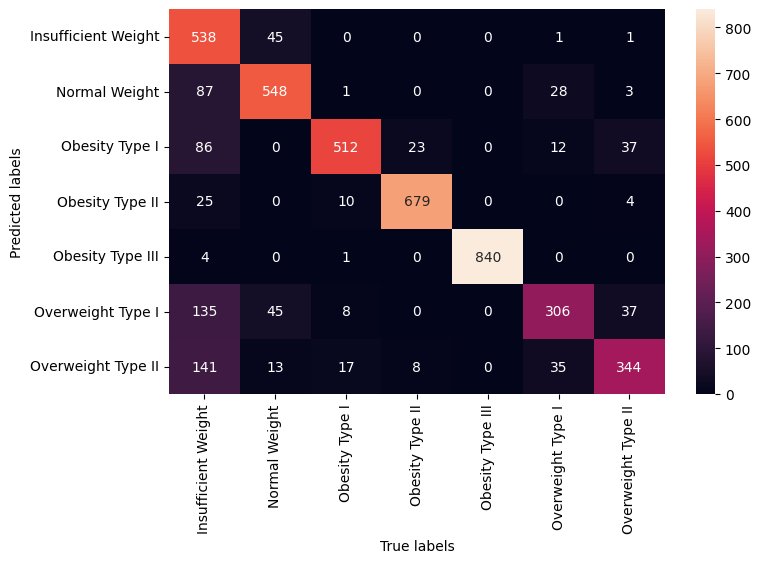

In [145]:
y_test_pred_rf = rf.predict(X_test)
metric_score(np.argmax(y_test, axis = 1), np.argmax(y_test_pred_rf, axis = 1))

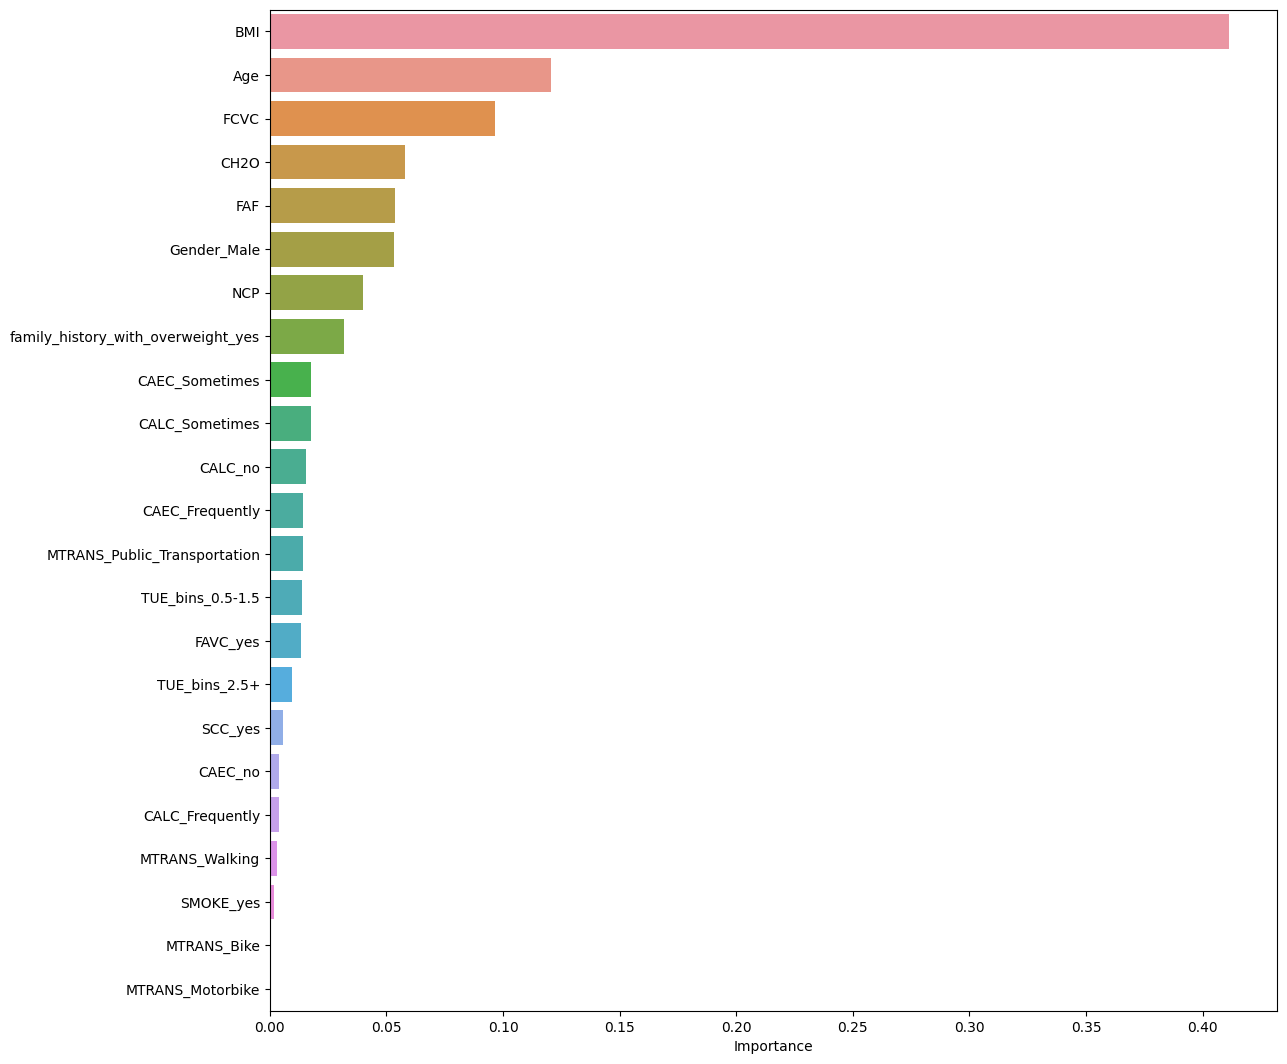

In [146]:
importances = rf.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x= importance_df.Importance, y=importance_df.index);

In [147]:
hyperparameters =rf.get_params()
print("Current Hyperparameters:")
print(hyperparameters)

Current Hyperparameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [148]:
predictions_rf = rf.predict(val_data2)
#labels_rf = [categories[row.argmax()] for row in predictions_rf]

In [149]:
pred_rf_labels = [row.argmax() for row in predictions_rf]

In [150]:
"""param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3, 4],
    #'min_samples_leaf': [3, 4, 5],
    #'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train2, y_train2)
print(grid_search.best_params_)"""

"param_grid = {\n    'bootstrap': [True],\n    'max_depth': [80, 90, 100],\n    'max_features': [2, 3, 4],\n    #'min_samples_leaf': [3, 4, 5],\n    #'min_samples_split': [8, 10, 12],\n    'n_estimators': [100, 200, 300]\n}\n\ngrid_search = GridSearchCV(estimator = rf, param_grid = param_grid, \n                          cv = 3, n_jobs = -1, verbose = 2)\n\ngrid_search.fit(X_train2, y_train2)\nprint(grid_search.best_params_)"

In [151]:
rf = RandomForestClassifier(random_state = 1,bootstrap= True, max_depth= 80, max_features= 4, n_estimators= 300)

In [152]:
"""output = pd.DataFrame(columns = ['id', 'NObeyesdad'])
output['id'] = val_ids
output['NObeyesdad'] = labels_rf

output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")"""

'output = pd.DataFrame(columns = [\'id\', \'NObeyesdad\'])\noutput[\'id\'] = val_ids\noutput[\'NObeyesdad\'] = labels_rf\n\noutput.to_csv(\'submission.csv\', index=False)\nprint("Your submission was successfully saved!")'

# Neural Network

In [153]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [225]:
X_train, X_test, y_train, y_test = train_test_split(full_train2, target_encoded, test_size = 0.2, random_state = 42)

In [226]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [227]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

In [158]:
val_data1 = np.asarray(val_data1).astype(np.float32)
val_data2 = np.asarray(val_data2).astype(np.float32)

In [228]:
# Initializing the ANN
model = Sequential()
model.add(Dense(256, activation = 'relu',kernel_initializer='he_uniform', input_dim = X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dense(128, activation = 'relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(7, activation = 'softmax'))

In [229]:
optimizer = tf.keras.optimizers.Adam(0.001)
#optimizer = 'SGD'
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [230]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6144      
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               1

In [231]:
class_weights[0] = 1.7

In [232]:
history=model.fit(X_train, y_train,
                  class_weight = class_weights,
          validation_split=0.2,
          epochs=20,
          batch_size=32,verbose=1)

Epoch 1/20
458/458 [==============================] - 3s 3ms/step - loss: 0.3426 - accuracy: 0.7083 - val_loss: 0.1486 - val_accuracy: 0.8286
Epoch 2/20
458/458 [==============================] - 1s 3ms/step - loss: 0.1677 - accuracy: 0.7814 - val_loss: 0.1193 - val_accuracy: 0.8439
Epoch 3/20
458/458 [==============================] - 1s 3ms/step - loss: 0.1579 - accuracy: 0.7853 - val_loss: 0.1098 - val_accuracy: 0.8573
Epoch 4/20
458/458 [==============================] - 1s 3ms/step - loss: 0.1507 - accuracy: 0.7989 - val_loss: 0.1172 - val_accuracy: 0.8415
Epoch 5/20
458/458 [==============================] - 1s 3ms/step - loss: 0.1460 - accuracy: 0.8057 - val_loss: 0.1042 - val_accuracy: 0.8634
Epoch 6/20
458/458 [==============================] - 1s 3ms/step - loss: 0.1412 - accuracy: 0.8148 - val_loss: 0.0995 - val_accuracy: 0.8746
Epoch 7/20
458/458 [==============================] - 1s 3ms/step - loss: 0.1413 - accuracy: 0.8135 - val_loss: 0.1099 - val_accuracy: 0.8500
Epoch 

In [233]:
#Printing results
results = model.evaluate(X_test, y_test)

143/143 [==============================] - 0s 1ms/step - loss: 0.1060 - accuracy: 0.8553


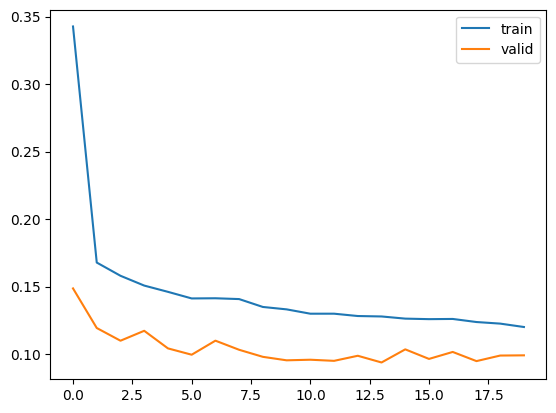

In [234]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

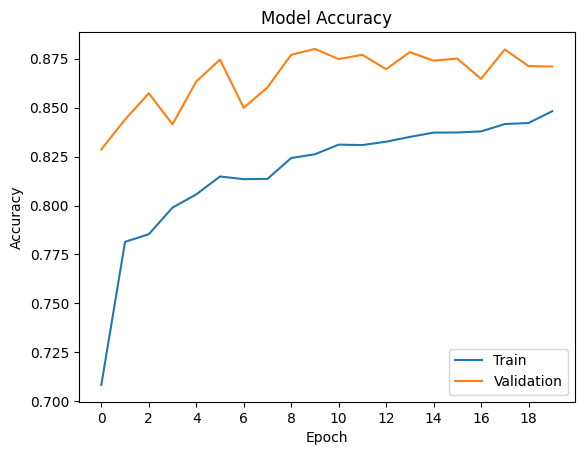

In [235]:
# Create a plot of history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(np.arange(0,20,2))
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [236]:
y_pred=model.predict(X_test)

143/143 [==============================] - 0s 1ms/step


              precision    recall  f1-score   support

           0       0.86      0.96      0.90       585
           1       0.84      0.77      0.80       667
           2       0.81      0.84      0.83       670
           3       0.94      0.95      0.94       718
           4       1.00      1.00      1.00       845
           5       0.68      0.76      0.72       531
           6       0.77      0.63      0.70       558

    accuracy                           0.86      4574
   macro avg       0.84      0.84      0.84      4574
weighted avg       0.86      0.86      0.85      4574



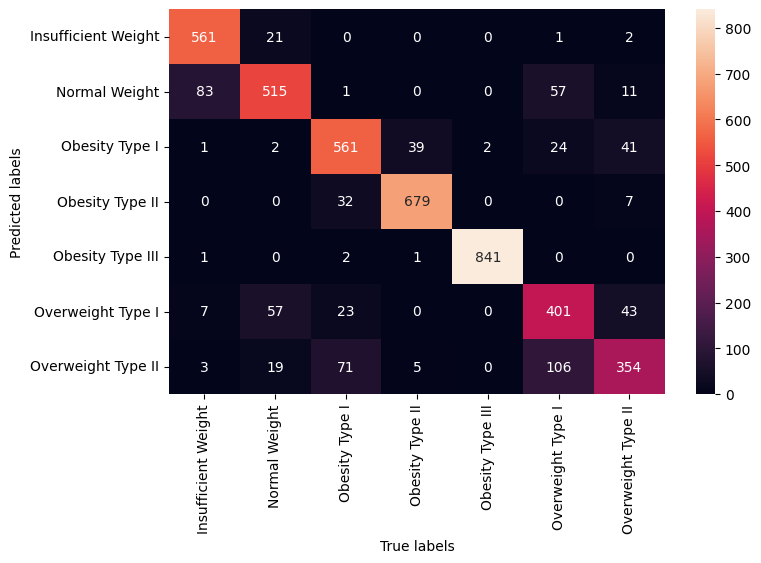

In [238]:
metric_score(np.argmax(y_test, axis = 1), np.argmax(y_pred, axis = 1))
#metric_score(y_test, np.argmax(y_pred, axis = 1))

In [239]:
predictions_dl = model.predict(val_data2)
#labels_dl = [categories[row.argmax()] for row in predictions_dl]

433/433 [==============================] - 1s 1ms/step


In [240]:
pred_dl_labels = [row.argmax() for row in predictions_dl]

In [181]:
"""output = pd.DataFrame(columns = ['id', 'NObeyesdad'])
output['id'] = val_ids
output['NObeyesdad'] = labels_dl

output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")"""

'output = pd.DataFrame(columns = [\'id\', \'NObeyesdad\'])\noutput[\'id\'] = val_ids\noutput[\'NObeyesdad\'] = labels_dl\n\noutput.to_csv(\'submission.csv\', index=False)\nprint("Your submission was successfully saved!")'

# XGBoost

In [182]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [247]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(full_train2, class_labels, test_size = 0.2, random_state = 42)

In [184]:
# Adaboost Classifier
adaboost_model = AdaBoostClassifier(random_state = 1)

# Fitting the model
adaboost_model.fit(X_train2, y_train2)


AdaBoostClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.64      0.59      0.61       558
           1       0.56      0.19      0.28       667
           2       0.40      0.88      0.55       585
           3       0.92      0.78      0.84       845
           4       0.56      0.87      0.68       718
           5       0.64      0.39      0.49       531
           6       0.77      0.46      0.57       670

    accuracy                           0.60      4574
   macro avg       0.64      0.59      0.58      4574
weighted avg       0.65      0.60      0.59      4574



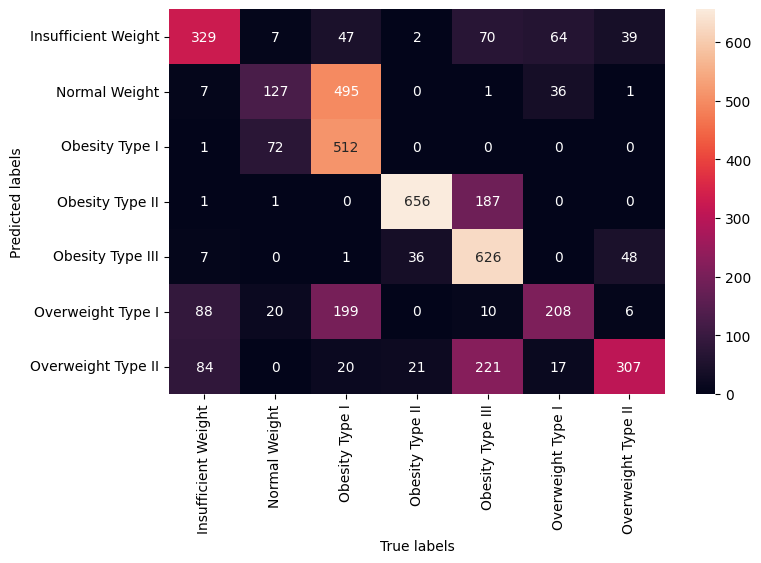

In [185]:
y_pred_adaboost=adaboost_model.predict(X_test2)
metric_score(y_test2, y_pred_adaboost)

In [186]:
hyperparameters =adaboost_model.get_params()
print("Current Hyperparameters:")
print(hyperparameters)

Current Hyperparameters:
{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': 1}


In [187]:
# Gradient Boost Classifier
gbc = GradientBoostingClassifier(random_state = 1)

# Fitting the model
gbc.fit(X_train2, y_train2)

GradientBoostingClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       558
           1       0.84      0.88      0.86       667
           2       0.93      0.92      0.93       585
           3       1.00      0.99      1.00       845
           4       0.95      0.96      0.95       718
           5       0.74      0.75      0.75       531
           6       0.89      0.84      0.86       670

    accuracy                           0.88      4574
   macro avg       0.87      0.87      0.87      4574
weighted avg       0.89      0.88      0.88      4574



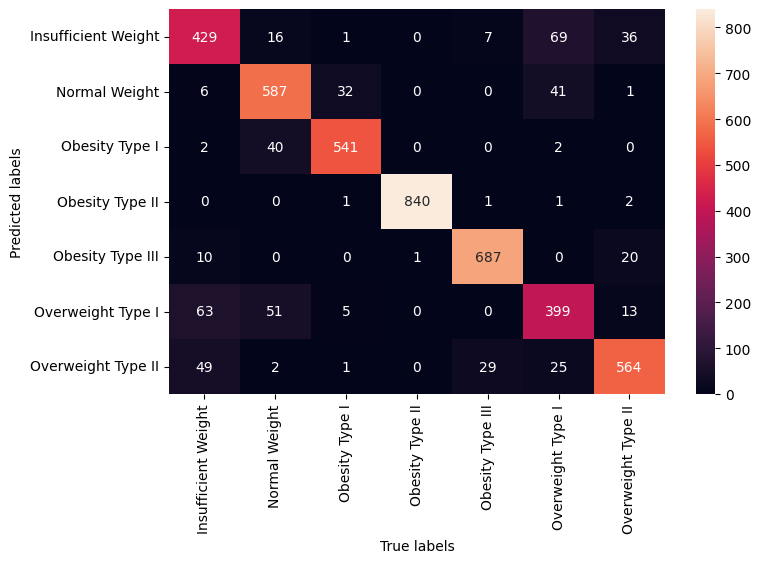

In [188]:
y_pred_gbc=gbc.predict(X_test2)
metric_score(y_test2, y_pred_gbc)

In [189]:
predictions_gbc = gbc.predict(val_data2)

In [190]:
# XGBoost Classifier
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss', colsample_bytree= 0.5, eta= 0.1, max_depth= 10, subsample= 0.5)

# Fitting the model
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

              precision    recall  f1-score   support

           0       0.53      0.92      0.67       585
           1       0.84      0.82      0.83       667
           2       0.93      0.76      0.84       670
           3       0.96      0.95      0.95       718
           4       1.00      0.99      1.00       845
           5       0.80      0.58      0.67       531
           6       0.81      0.62      0.70       558

    accuracy                           0.82      4574
   macro avg       0.84      0.81      0.81      4574
weighted avg       0.85      0.82      0.83      4574



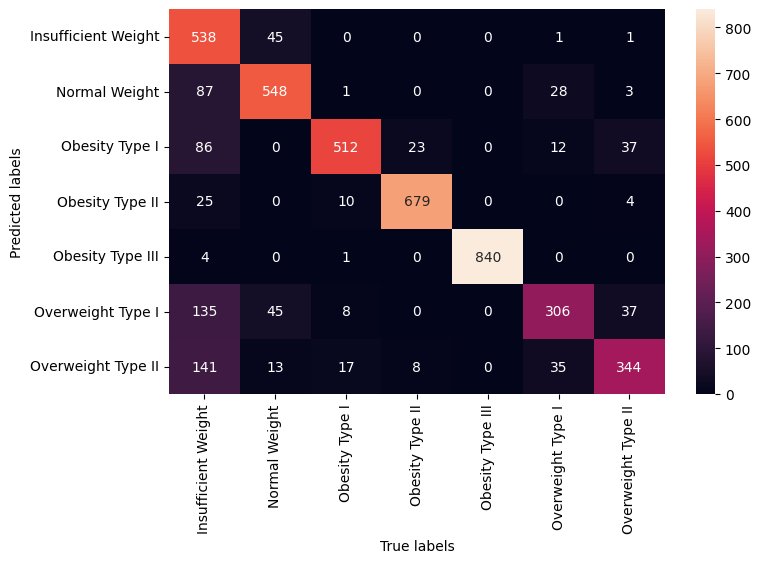

In [191]:
y_pred_xgb=xgb.predict(X_test)
metric_score(np.argmax(y_test, axis = 1), np.argmax(y_test_pred_rf, axis = 1))

In [192]:
"""param_grid = {
    'eta': [0.01,0.05,0.1,0.2],
    'max_depth': [3,5,7,10],
    'subsample': [0.5,0.7,1],
    'colsample_bytree':[0.5,0.7,1]
}

grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train2, y_train2)
print(grid_search.best_params_)"""

"param_grid = {\n    'eta': [0.01,0.05,0.1,0.2],\n    'max_depth': [3,5,7,10],\n    'subsample': [0.5,0.7,1],\n    'colsample_bytree':[0.5,0.7,1]\n}\n\ngrid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, \n                          cv = 3, n_jobs = -1, verbose = 2)\n\ngrid_search.fit(X_train2, y_train2)\nprint(grid_search.best_params_)"

In [193]:
predictions_xgb = xgb.predict(val_data2)
pred_xgb_labels = [row.argmax() for row in predictions_xgb]

In [194]:
"""labels_xgb =[categories[row.argmax()] for row in predictions_xgb]
output = pd.DataFrame(columns = ['id', 'NObeyesdad'])
output['id'] = val_ids
output['NObeyesdad'] = labels_xgb

output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")"""

'labels_xgb =[categories[row.argmax()] for row in predictions_xgb]\noutput = pd.DataFrame(columns = [\'id\', \'NObeyesdad\'])\noutput[\'id\'] = val_ids\noutput[\'NObeyesdad\'] = labels_xgb\n\noutput.to_csv(\'submission.csv\', index=False)\nprint("Your submission was successfully saved!")'

In [195]:
import lightgbm as lgb

In [196]:

clf = lgb.LGBMClassifier(random_state = 1)
clf.fit(X_train2, y_train2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1553
[LightGBM] [Info] Number of data points in the train set: 18295, number of used features: 23
[LightGBM] [Info] Start training from score -2.093921
[LightGBM] [Info] Start training from score -1.912636
[LightGBM] [Info] Start training from score -2.113635
[LightGBM] [Info] Start training from score -1.646747
[LightGBM] [Info] Start training from score -1.867412
[LightGBM] [Info] Start training from score -2.124554
[LightGBM] [Info] Start training from score -1.954584


LGBMClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       558
           1       0.84      0.88      0.86       667
           2       0.93      0.92      0.93       585
           3       1.00      1.00      1.00       845
           4       0.95      0.97      0.96       718
           5       0.73      0.75      0.74       531
           6       0.90      0.85      0.87       670

    accuracy                           0.89      4574
   macro avg       0.88      0.88      0.88      4574
weighted avg       0.89      0.89      0.89      4574



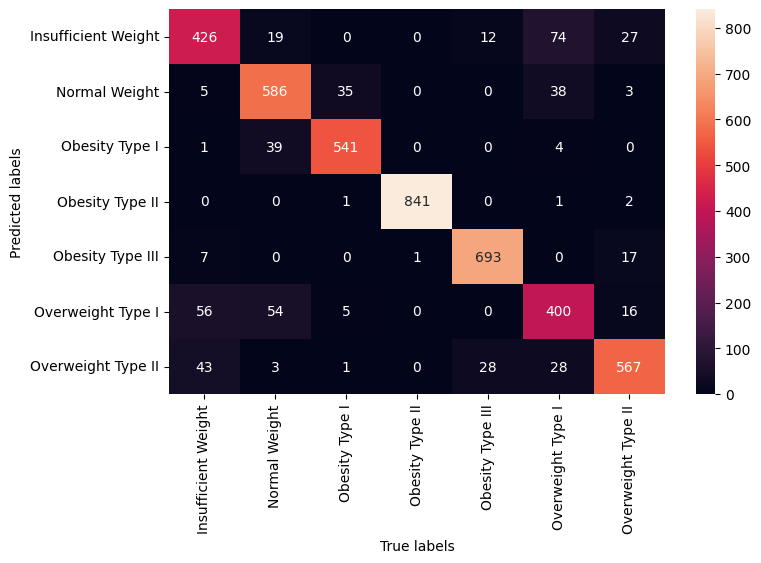

In [197]:
y_pred_clf=clf.predict(X_test2)
metric_score(y_test2, y_pred_clf)

In [198]:
predictions_clf = clf.predict(val_data2)
#pred_clf_labels = [row.argmax() for row in predictions_clf]

In [199]:
"""labels = [categories[i] for i in predictions_clf]
output = pd.DataFrame(columns = ['id', 'NObeyesdad'])
output['id'] = val_ids
output['NObeyesdad'] = labels

output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")"""

'labels = [categories[i] for i in predictions_clf]\noutput = pd.DataFrame(columns = [\'id\', \'NObeyesdad\'])\noutput[\'id\'] = val_ids\noutput[\'NObeyesdad\'] = labels\n\noutput.to_csv(\'submission.csv\', index=False)\nprint("Your submission was successfully saved!")'

In [200]:
!pip install scikeras

# Ensemble learning

In [242]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier

In [243]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier

In [250]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [251]:
# Creating a model with correct output
model1 = Sequential()
model1.add(Dense(256, activation = 'relu',kernel_initializer='he_uniform', input_dim = X_train.shape[1]))
model1.add(BatchNormalization())
model1.add(Dense(128, activation = 'relu',kernel_initializer='he_uniform'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(128, activation = 'relu',kernel_initializer='he_uniform'))
model1.add(BatchNormalization())
model1.add(Dense(64, activation = 'relu',kernel_initializer='he_uniform'))
model1.add(BatchNormalization())
model1.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model1.add(BatchNormalization())
model1.add(Dense(1, activation = 'softmax'))

In [267]:
optimizer = tf.keras.optimizers.Adam(0.001)
#optimizer = 'SGD'
model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [252]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6144      
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               1

In [272]:
# Create a Stacking Classifier with the individual base models
base_models = [
    #('rf', rf),
    ('xgb', xgb),
    #('dt',dt),
    ('clf', clf),
    #('gbc', gbc)
    ('neural_network', KerasClassifier(model=model1, epochs=20, batch_size=32))]
     #, class_weight = class_weights))

stacked_model = StackingClassifier(estimators=base_models, final_estimator=xgb)

# Create a Pipeline to combine data preprocessing and model training
pipeline = Pipeline(steps=[
    # Add any preprocessing steps if needed
    ('stacked_model', stacked_model)
])

# Fit the pipeline on the training data
pipeline.fit(X_train2, y_train2)


# Make predictions using the trained pipeline
predictions = pipeline.predict(X_test2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1553
[LightGBM] [Info] Number of data points in the train set: 18295, number of used features: 23
[LightGBM] [Info] Start training from score -2.093921
[LightGBM] [Info] Start training from score -1.912636
[LightGBM] [Info] Start training from score -2.113635
[LightGBM] [Info] Start training from score -1.646747
[LightGBM] [Info] Start training from score -1.867412
[LightGBM] [Info] Start training from score -2.124554
[LightGBM] [Info] Start training from score -1.954584
Epoch 1/20
572/572 [==============================] - 3s 3ms/step - loss: -37.3358 - accuracy: 0.1477
Epoch 2/20
572/572 [==============================] - 1s 2ms/step - loss: -214.3660 - accuracy: 0.1477
Epoch 3/20
572/572 [==============================] - 1s 2ms/ste

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       558
           1       0.83      0.87      0.85       667
           2       0.93      0.91      0.92       585
           3       1.00      0.99      1.00       845
           4       0.94      0.96      0.95       718
           5       0.72      0.75      0.73       531
           6       0.89      0.84      0.86       670

    accuracy                           0.88      4574
   macro avg       0.87      0.87      0.87      4574
weighted avg       0.88      0.88      0.88      4574



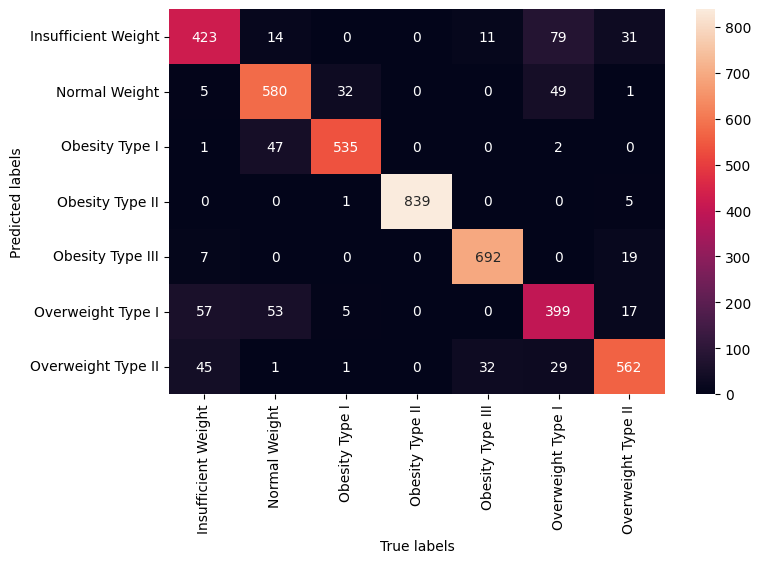

In [273]:
metric_score(y_test2, predictions)

In [203]:
"""predictions_ens = pipeline.predict(val_data2)
#labels_dl = [categories[row.argmax()] for row in predictions_dl]"""

'predictions_ens = pipeline.predict(val_data2)\n#labels_dl = [categories[row.argmax()] for row in predictions_dl]'

In [204]:
"""labels_ens = [categories[i] for i in predictions_ens]
output = pd.DataFrame(columns = ['id', 'NObeyesdad'])
output['id'] = val_ids
output['NObeyesdad'] = labels_ens

output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")"""

'labels_ens = [categories[i] for i in predictions_ens]\noutput = pd.DataFrame(columns = [\'id\', \'NObeyesdad\'])\noutput[\'id\'] = val_ids\noutput[\'NObeyesdad\'] = labels_ens\n\noutput.to_csv(\'submission.csv\', index=False)\nprint("Your submission was successfully saved!")'